##               Telecom churn case study
### We need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.
### This project is based on the Indian and Southeast Asian market.



### Step 1: Importing and familiarizing with Data

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [165]:
data=pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Step 2: Data Manipulation

In [167]:
recharge_columns=data.columns[data.columns.str.contains('rech_amt|rech_data')]
print(recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


### Lets check any missing value in recharge_columns

In [168]:
100*data.loc[:,recharge_columns].isnull().sum()/len(data)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

In [169]:
recharge_column_6=data.columns[data.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]

In [170]:
data.loc[:,recharge_column_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982
std,398.019701,120.614894,2.789128,108.477235,192.646318
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,109.000000,30.000000,1.000000,25.000000,82.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


In [171]:
#lets check how many ave_amt_data is NaN
is_invalid_data_6 = data['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = data['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = data['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(data.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(data.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(data.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# check how many total_rech_data_6 is NA
is_invalid_data_6 = data['total_rech_data_6'] == np.nan 
is_invalid_data_7 = data['total_rech_data_7'] == np.nan 
is_invalid_data_8 = data['total_rech_data_8'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data_6
print(data.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(data.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(data.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


In [172]:
data.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']]= \
data.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']].replace(np.NaN,0)

In [173]:
data.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']]= \
data.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.NaN,0)

In [175]:
data['total_avg_rech_amnt_good_ph'] =(data.total_rech_amt_6+data.total_rech_amt_7)/2

In [176]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = data.total_avg_rech_amnt_good_ph > data.total_avg_rech_amnt_good_ph.quantile(0.7)

In [177]:
# let us subset out the High Value customers
data = data.loc[high_value_filter,:]

In [178]:
# let us check how many records remain
len(data.loc[high_value_filter,:])

29979

In [179]:
data['churn']= 0

In [180]:
# let's check if any NA/Null values are present
ls_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
100*data.loc[:,ls_9].isnull().sum()/len(data)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [181]:
# define is_churned boolean flag for customers where above values are zero
is_churned = (data.total_ic_mou_9 == 0) & (data.total_og_mou_9 == 0) & (data.vol_2g_mb_9 ==0)& \
(data.vol_3g_mb_9 ==0)

In [182]:
# set all such rows fulfilling is_churned condition as 1
data.loc[is_churned,'churn']=1

In [183]:
# let us check what's the % of churned customers
100*data.churn.sum()/len(is_churned)

8.636045231662164

In [184]:
# let's extract all list of 9th Month (churned month) Columns
month_9_columns =  data.columns[data.columns.str.contains('_9')]

In [185]:
# drop all columns corresponding to the attributes of churn phase
data.drop(month_9_columns,axis=1,inplace=True)

In [186]:
# let's check how many columns remain
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 177 entries, mobile_number to churn
dtypes: float64(140), int64(28), object(9)
memory usage: 40.7+ MB


In [155]:
100*data.isnull().sum()/len(data.index)

mobile_number                   0.000000
circle_id                       0.000000
loc_og_t2o_mou                  0.380266
std_og_t2o_mou                  0.380266
loc_ic_t2o_mou                  0.380266
last_date_of_month_6            0.000000
last_date_of_month_7            0.103406
last_date_of_month_8            0.523700
arpu_6                          0.000000
arpu_7                          0.000000
arpu_8                          0.000000
onnet_mou_6                     1.054071
onnet_mou_7                     1.010707
onnet_mou_8                     3.128857
offnet_mou_6                    1.054071
offnet_mou_7                    1.010707
offnet_mou_8                    3.128857
roam_ic_mou_6                   1.054071
roam_ic_mou_7                   1.010707
roam_ic_mou_8                   3.128857
roam_og_mou_6                   1.054071
roam_og_mou_7                   1.010707
roam_og_mou_8                   3.128857
loc_og_t2t_mou_6                1.054071
loc_og_t2t_mou_7

In [187]:
# create function to anlyze the features across 6th, 7th and 8th month
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": data[data["churn"] == churn][cols[6]].mean(),
        "mean_7": data[data["churn"] == churn][cols[7]].mean(),
        "mean_8": data[data["churn"] == churn][cols[8]].mean(),
        "std_6": data[data["churn"] == churn][cols[6]].std(),
        "std_7": data[data["churn"] == churn][cols[7]].std(),
        "std_8": data[data["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=data, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=data, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=data, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

In [188]:
#let's again extract the recharge amount related columns
recharge_amnt_columns = data.columns[data.columns.str.contains('rech_amt')]

recharge_amnt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8'],
      dtype='object')

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,687.20,701.78,647.46,527.08,553.98,604.13
Non Churned,809.06,638.43,258.90,646.24,641.33,445.05


<Figure size 1224x504 with 0 Axes>

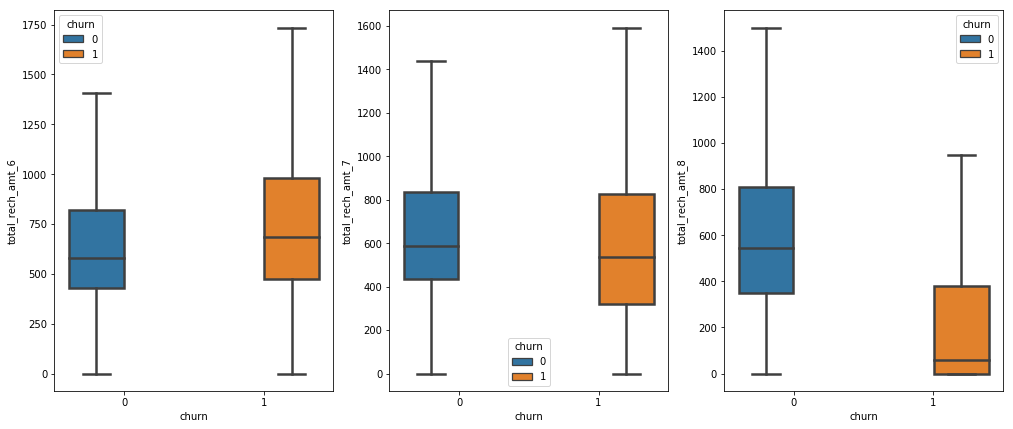

In [189]:
# let's analyze total recharge amount:
analyze_feature('total_rech_amt')

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_data_6', 7: 'total_rech_amt_data_7', 8: 'total_rech_amt_data_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,299.16,352.54,338.14,1365.07,1383.36,1549.47
Non Churned,215.68,211.23,54.08,866.08,1074.68,378.70


<Figure size 1224x504 with 0 Axes>

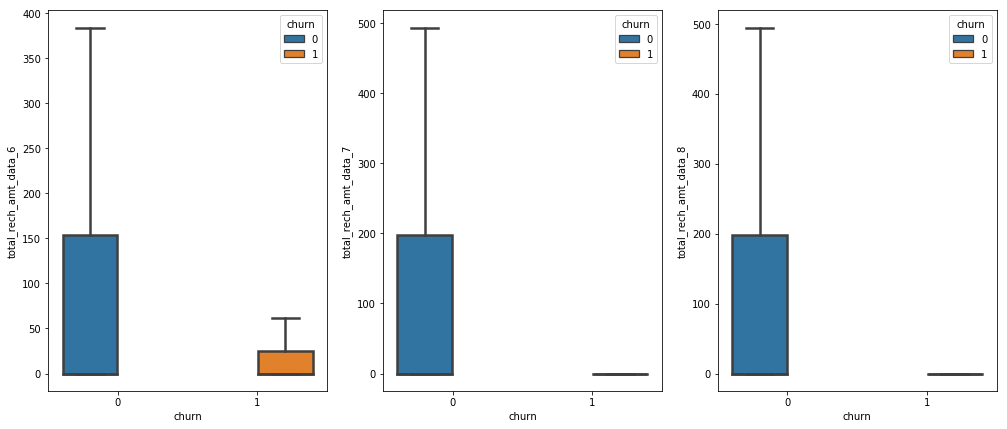

In [190]:
# let's analyze total recharge amount for data:
analyze_feature('total_rech_amt_data')

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,171.92,177.52,170.37,171.74,177.37,171.02
Non Churned,166.71,156.70,84.22,203.99,220.70,170.40


<Figure size 1224x504 with 0 Axes>

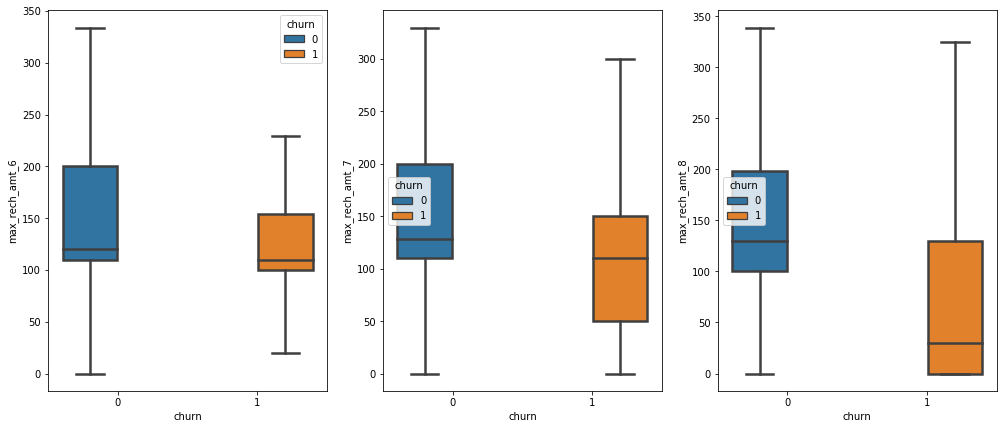

In [160]:
# let's analyze maximum recharge amount for data:
analyze_feature('max_rech_amt')

In [191]:
# drop av_rech_amt_data and total_rech_data columns as total_rech_amt_data derived using these columns.
data.drop(['av_rech_amt_data_6','av_rech_amt_data_7'
                   ,'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

In [192]:
# Let us define 3 new derived columns
data['avg_rech_amt_good_ph'] = (data.total_rech_amt_6 + data.total_rech_amt_7)/2
data['avg_rech_amt_data_good_ph'] = (data.total_rech_amt_data_6 + data.total_rech_amt_data_7)/2
data['avg_max_rech_amt_good_ph'] = (data.max_rech_amt_6 + data.max_rech_amt_7)/2

# drop the original columns as these are not longer required
data.drop(['total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7'],axis=1,inplace=True)

# also drop total_avg_rech_amnt_good_ph as we are using the component columns defined above
data.drop('total_avg_rech_amnt_good_ph',axis=1,inplace=True)

In [193]:
#let's extract the last day recharge amount columns
last_day_rech_amt = data.columns[data.columns.str.contains('day')]

Churn Stats (mean and standard deviation):
{6: 'last_day_rch_amt_6', 7: 'last_day_rch_amt_7', 8: 'last_day_rch_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,104.87,107.80,101.47,140.34,140.04,145.88
Non Churned,101.30,78.92,34.42,166.83,150.23,123.69


<Figure size 1224x504 with 0 Axes>

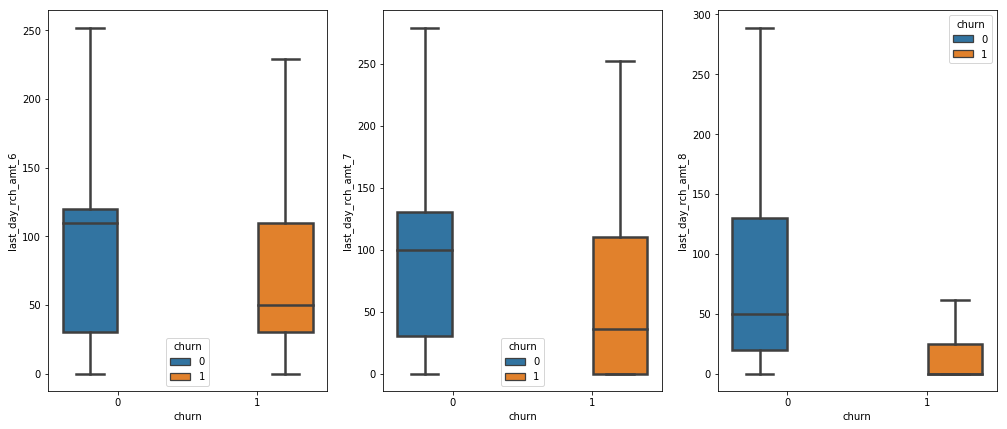

In [194]:
# let's check the mean variation in last day recharge for churned and non churned customers
analyze_feature('last_day_rch_amt')

In [195]:
# Let us define new derived column
data['last_day_rch_amt_good_ph'] = (data.last_day_rch_amt_6 + data.last_day_rch_amt_7)/2

# drop the original columns as these are not longer required
data.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)

In [196]:
# Let's check other recharge related variables:
ls_recharge = data.columns[data.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [197]:
# lets check the % of NA values for recharge related variables
100*data.loc[:,ls_recharge].isnull().sum()/len(data)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     62.016745
max_rech_data_7     61.132793
max_rech_data_8     60.835918
dtype: float64

In [198]:
# let's check the distribution for max_rech_data
data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,11387.000000,11652.000000,11741.000000
mean,149.932730,151.070031,141.141044
std,124.726818,127.107612,126.224685
min,1.000000,1.000000,1.000000
25%,41.000000,33.000000,25.000000
50%,154.000000,154.000000,154.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


In [199]:
data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

In [200]:
# Let us define new derived column
# maximum recharge for data for good phase: max_rech_data_good_ph
data['max_avg_rech_data_good_ph'] = (data.max_rech_data_6 + data.max_rech_data_7)/2

# drop the original columns as these are not longer required
data.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

In [85]:
# let's check total recharge number
ls_tot_recharge_num = data.columns[data.columns.str.contains('total_rech_num')]

# check the summary stats:
print(data.loc[:,ls_tot_recharge_num].describe())

# let's check the median variation in total recharge numbers for churned and non churned customers
pd.DataFrame([data.loc[data.churn==0,ls_tot_recharge_num].median()
              ,data.loc[data.churn==1,ls_tot_recharge_num].median()],index={'Non Churned','Churned'})

       total_rech_num_6  total_rech_num_7  total_rech_num_8
count      29953.000000      29953.000000      29953.000000
mean          11.853804         11.724635          9.975595
std            9.428779          9.434662          9.276133
min            0.000000          0.000000          0.000000
25%            6.000000          6.000000          4.000000
50%            9.000000          9.000000          8.000000
75%           15.000000         15.000000         13.000000
max          307.000000        138.000000        196.000000


,total_rech_num_6,total_rech_num_7,total_rech_num_8
Churned,NaN,NaN,NaN
Non Churned,11.0,9.0,3.0


In [201]:
# Let us define new derived column
# total recharge number for good phase: total_rech_num_good_ph
data['total_rech_num_good_ph'] = (data.total_rech_num_6 + data.total_rech_num_7)/2

# drop the original columns as these are not longer required
data.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

## Lets extract 2G and 3G data

In [202]:
#let's extract the 2G and 3G usage related columns
typ_2g_or_3g = data.columns[data.columns.str.contains('2g|3g',regex=True)]

In [203]:
#let us check the % of NA values present
data.loc[:,typ_2g_or_3g].isnull().sum()/len(data.loc[:,typ_2g_or_3g])

count_rech_2g_6    0.620167
count_rech_2g_7    0.611328
count_rech_2g_8    0.608359
count_rech_3g_6    0.620167
count_rech_3g_7    0.611328
count_rech_3g_8    0.608359
vol_2g_mb_6        0.000000
vol_2g_mb_7        0.000000
vol_2g_mb_8        0.000000
vol_3g_mb_6        0.000000
vol_3g_mb_7        0.000000
vol_3g_mb_8        0.000000
arpu_3g_6          0.620167
arpu_3g_7          0.611328
arpu_3g_8          0.608359
arpu_2g_6          0.620167
arpu_2g_7          0.611328
arpu_2g_8          0.608359
monthly_2g_6       0.000000
monthly_2g_7       0.000000
monthly_2g_8       0.000000
sachet_2g_6        0.000000
sachet_2g_7        0.000000
sachet_2g_8        0.000000
monthly_3g_6       0.000000
monthly_3g_7       0.000000
monthly_3g_8       0.000000
sachet_3g_6        0.000000
sachet_3g_7        0.000000
sachet_3g_8        0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
sep_vbc_3g         0.000000
dtype: float64

In [204]:
data.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [205]:
# let's extract volume of 2G and 3G usage columns
volume_of_usage_3g_and_2g = data.columns[data.columns.str.contains('vol_2g|vol_3g',regex=True)]

# let's check the summary stats:
print(data.loc[:,volume_of_usage_3g_and_2g].describe())

        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean      78.875263     78.196804     69.248761    258.623297    278.341301   
std      277.525473    280.430249    268.616268    866.619871    856.096362   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       14.470000     14.960000      9.625000      0.000000      2.275000   
max    10285.900000   7873.550000  11117.610000  45735.400000  28144.120000   

        vol_3g_mb_8  
count  29979.000000  
mean     270.061116  
std      859.715968  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    30036.060000  


In [47]:
# let's check the mean variation in volume of 2G/3G usage for churned and non churned customers
pd.DataFrame([data.loc[data.churn==0,volume_of_usage_3g_and_2g].mean()
              ,data.loc[data.churn==1,volume_of_usage_3g_and_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Non Churned,128.041335,128.450758,113.500101,350.687700,384.507052,376.076421
Churned,109.951146,88.687888,22.636193,278.915895,218.154932,87.193178


In [89]:
# Let us define two new derived columns
data['vol_2g_mb_good_ph'] = (data.vol_2g_mb_6 + data.vol_2g_mb_7)/2
data['vol_3g_mb_good_ph'] = (data.vol_3g_mb_6 + data.vol_3g_mb_7)/2

# drop the original columns as these are not longer required
data.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [90]:
# let's check monthly 2G/3G service schemes
monthly_2g_3g = data.columns[data.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

# let's check the summary stats:
print(data.loc[:,monthly_2g_3g].describe())

       monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean       0.174473      0.183187      0.153541      0.218075      0.229359   
std        0.435021      0.450466      0.406481      0.613612      0.659575   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      5.000000      5.000000     14.000000     16.000000   

       monthly_3g_8  
count  29953.000000  
mean       0.211264  
std        0.617885  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       16.000000  


In [50]:
# let's check the mean variation in monthly schemes of 2G/3G usage for churned and non churned customers
pd.DataFrame([data.loc[data.churn==0,monthly_2g_3g].mean()
              ,data.loc[data.churn==1,monthly_2g_3g].mean()],index={'Non Churned','Churned'})

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churned,0.181967,0.193557,0.165458,0.220234,0.237326,0.225446
Churned,0.092681,0.070008,0.023469,0.194511,0.142403,0.056484


In [91]:
# Let us define two new derived columns
# 2G monthly for good phase: monthly_2g_good_ph
# 3G monthly for good phase: monthly_3g_good_ph
data['monthly_2g_good_ph'] = (data.monthly_2g_6 + data.monthly_2g_7)/2
data['monthly_3g_good_ph'] = (data.monthly_3g_6 + data.monthly_3g_7)/2

# drop the original columns as these are not longer required
data.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1,inplace=True)

In [92]:
# let us rename month named vbc columns to 6,7,8,9 format
data.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
data.drop('vbc_3g_9',axis=1,inplace=True)

Churn Stats (mean and standard deviation):
{6: 'vbc_3g_6', 7: 'vbc_3g_7', 8: 'vbc_3g_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,NaN,NaN,NaN,NaN,NaN,NaN
Non Churned,114.3,96.11,40.73,357.0,312.21,210.66


<Figure size 1224x504 with 0 Axes>

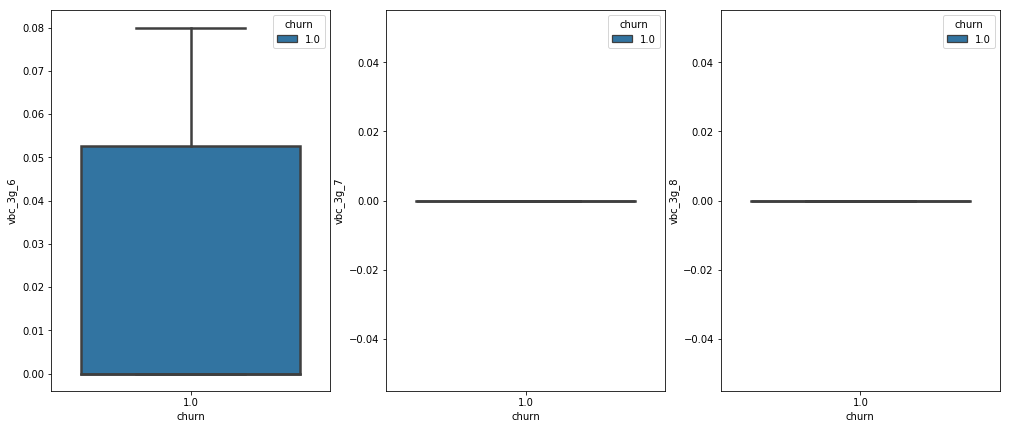

In [93]:
# let's check the volumne based cost for 3G
volumn_based_cost_3g = data.columns[data.columns.str.contains('vbc_3g')]

# analyze volume based cost
analyze_feature('vbc_3g')

In [54]:
# Let us define new derived columns
# 3g volume based cost for good phase: vbc_3g_good_ph
data['vbc_3g_good_ph'] = (data['vbc_3g_6'] + data['vbc_3g_7'])/2

# drop the original columns as these are not longer required
data.drop(['vbc_3g_6','vbc_3g_7'],axis=1,inplace=True)

In [94]:
# let's check 2G/3G
sachet_2g_or_3g = data.columns[data.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

print(data.loc[:,sachet_2g_or_3g].describe())

pd.DataFrame([data.loc[data.churn==0,sachet_2g_or_3g].mean()
              ,data.loc[data.churn==1,sachet_2g_or_3g].mean()],index={'Non Churned','Churned'})

        sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_3g_6   sachet_3g_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean       1.067439      1.215538      1.055754      0.209662      0.227790   
std        2.508864      2.737921      2.537308      0.986408      1.090717   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max       42.000000     48.000000     44.000000     29.000000     35.000000   

        sachet_3g_8  
count  29953.000000  
mean       0.202451  
std        1.100735  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       41.000000  


,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Churned,NaN,NaN,NaN,NaN,NaN,NaN
Non Churned,1.033811,0.885839,0.269292,0.239061,0.219968,0.064041


In [56]:
# Let us define two new derived columns
# 2G sachet for good phase: sachet_2g_good_ph
# 3G sachet for good phase: sachet_3g_good_ph
data['sachet_2g_good_ph'] = (data.sachet_2g_6 + data.sachet_2g_7)/2
data['sachet_3g_good_ph'] = (data.sachet_3g_6 + data.sachet_3g_7)/2

# drop the original columns as these are not longer required
data.drop(['sachet_2g_6','sachet_2g_7'
              ,'sachet_3g_6','sachet_3g_7'],axis=1,inplace=True)

In [95]:
# let's check the age on n/w for churned and non churned customers
print(data.loc[data.churn==1,'aon'].mean())
print(data.loc[data.churn==0,'aon'].mean())

859.0007955449483
nan


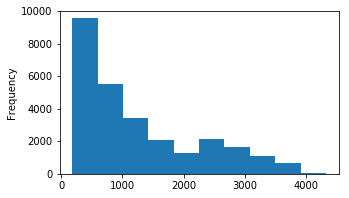

In [58]:
# let's check the age distribution for non churned customers
plt.figure(figsize=(5,3))
data.loc[data.churn==0,'aon'].plot.hist()

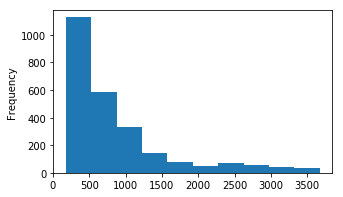

In [96]:
# let's check the age distribution for churned customers
plt.figure(figsize=(5,3))
data.loc[data.churn==1,'aon'].plot.hist()

In [60]:
# let's check the circle id values
data.circle_id.unique()

# let's drop this column as there is only one circle id
data.drop('circle_id',inplace=True,axis=1)

In [97]:
# extract the date columns
date_columns = data.columns[data.columns.str.contains('date')]

# convert to datetime
for date_col in list(date_columns):
    data[date_col]= pd.to_datetime(data[date_col])

In [62]:
print(data.last_date_of_month_6.dt.day.unique(),data.last_date_of_month_7.dt.day.unique()
      ,data.last_date_of_month_8.dt.day.unique())

# as only 1 unique value last day of month is present these columns are not adding much information
# let us drop the columns
data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

[30] [31. nan] [31. nan]


In [98]:
# let's extract the day of last recharge
data['day_of_last_rech_6'] =  data.date_of_last_rech_6.dt.day
data['day_of_last_rech_7'] = data.date_of_last_rech_7.dt.day
data['day_of_last_rech_8'] =  data.date_of_last_rech_8.dt.day

dt_of_last_rech_cols = ['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']

pd.DataFrame([data.loc[data.churn==0,dt_of_last_rech_cols].median()
              ,data.loc[data.churn==1,dt_of_last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
Churned,NaN,NaN,NaN
Non Churned,28.0,27.0,26.0


In [64]:
data['day_of_last_rech_shift'] = data.day_of_last_rech_8 -(data.day_of_last_rech_6+data.day_of_last_rech_7)/2

In [65]:
# let's check how the shift indicates pattern for Churned and non churn customers
pd.DataFrame([data.loc[data.churn==0,['day_of_last_rech_shift']].median()
              ,data.loc[data.churn==1,['day_of_last_rech_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_shift
Non Churned,0.5
Churned,-2.0


In [66]:
# let's delete the other colummns derived as are no longer required
data.drop(['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8'],axis=1,inplace=True)

In [67]:
# let's extract the day of last recharge for data
data['day_of_last_rech_data_6'] = data.date_of_last_rech_data_6.dt.day
data['day_of_last_rech_data_7'] =  data.date_of_last_rech_data_7.dt.day
data['day_of_last_rech_data_8'] = data.date_of_last_rech_data_8.dt.day

dt_of_last_rech_cols = ['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']

pd.DataFrame([data.loc[data.churn==0,dt_of_last_rech_cols].median()
              ,data.loc[data.churn==1,dt_of_last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8
Non Churned,22.0,24.0,23.0
Churned,23.0,20.0,15.0


In [68]:
data['day_of_last_rech_data_shift'] = data.day_of_last_rech_data_8 -(data.day_of_last_rech_data_6+data.day_of_last_rech_data_7)/2

In [69]:
# let's check how the shift indicates pattern for Churned and non churn customers
pd.DataFrame([data.loc[data.churn==0,['day_of_last_rech_data_shift']].median()
              ,data.loc[data.churn==1,['day_of_last_rech_data_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_shift
Non Churned,-0.5
Churned,-6.0


In [70]:
# let's delete the other colummns derived as are no longer required
data.drop(['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8'],axis=1,inplace=True)

In [71]:
# let us drop the date columns as we have derived day of month variables from them
data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

Churn Stats (mean and standard deviation):
{6: 'arpu_6', 7: 'arpu_7', 8: 'arpu_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,549.56,563.19,533.50,447.24,474.34,504.30
Churned,659.88,539.05,240.32,580.03,537.87,386.95


<Figure size 1224x504 with 0 Axes>

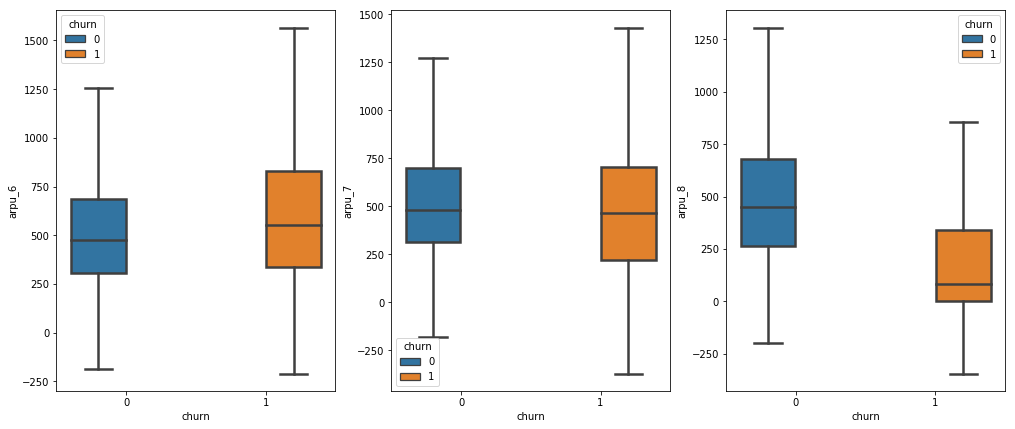

In [72]:
# extract columns for average revenue per user
arpu_cols = data.columns[data.columns.str.contains('arpu_')]
analyze_feature('arpu')

In [73]:
data['arpu_good_ph'] = (data.arpu_6 + data.arpu_7)/2

# drop the original columns as these are not longer required
data.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

In [74]:
# let's derive minutes of usage columns
mou_cols = data.columns[data.columns.str.contains('mou')]

In [75]:
mou_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [79]:
# let's check if there are any zero variation columns among these
zero_var_cols = data.loc[:,mou_cols].std()[data.loc[:,mou_cols].std()==0].index.values

zero_var_cols

array([], dtype=object)

In [80]:
# let's drop these columns
data.drop(list(zero_var_cols),axis=1,inplace=True)

In [81]:
# let's check the % of null values among mou variables
mou_cols = data.columns[data.columns.str.contains('mou')]
100*data.loc[:,mou_cols].isnull().sum()/len(data.loc[:,mou_cols])

onnet_mou_6         1.809502
onnet_mou_7         1.789470
onnet_mou_8         3.912797
offnet_mou_6        1.809502
offnet_mou_7        1.789470
offnet_mou_8        3.912797
roam_ic_mou_6       1.809502
roam_ic_mou_7       1.789470
roam_ic_mou_8       3.912797
roam_og_mou_6       1.809502
roam_og_mou_7       1.789470
roam_og_mou_8       3.912797
loc_og_t2t_mou_6    1.809502
loc_og_t2t_mou_7    1.789470
loc_og_t2t_mou_8    3.912797
loc_og_t2m_mou_6    1.809502
loc_og_t2m_mou_7    1.789470
loc_og_t2m_mou_8    3.912797
loc_og_t2f_mou_6    1.809502
loc_og_t2f_mou_7    1.789470
loc_og_t2f_mou_8    3.912797
loc_og_t2c_mou_6    1.809502
loc_og_t2c_mou_7    1.789470
loc_og_t2c_mou_8    3.912797
loc_og_mou_6        1.809502
loc_og_mou_7        1.789470
loc_og_mou_8        3.912797
std_og_t2t_mou_6    1.809502
std_og_t2t_mou_7    1.789470
std_og_t2t_mou_8    3.912797
                      ...   
loc_ic_t2m_mou_6    1.809502
loc_ic_t2m_mou_7    1.789470
loc_ic_t2m_mou_8    3.912797
loc_ic_t2f_mou

In [82]:
# let's check the maximum % of missing value
100*data.loc[:,mou_cols].isnull().sum().max()/len(data.loc[:,mou_cols])

3.91279671485327

In [83]:
# replaceing null values by 0 for minutes of usage variables
data.loc[:,mou_cols] = data.loc[:,mou_cols].replace(np.NaN,0)

In [84]:
# let's collect mou variables for month 6
mou_6 = data.columns[data.columns.str.contains('mou_6')]

In [85]:
mou_6

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

In [86]:
mou_og_cols6 = data.columns[data.columns.str.contains('.*_og_.*mou_6',regex=True)]

## Lets create correlation matrix heatmap

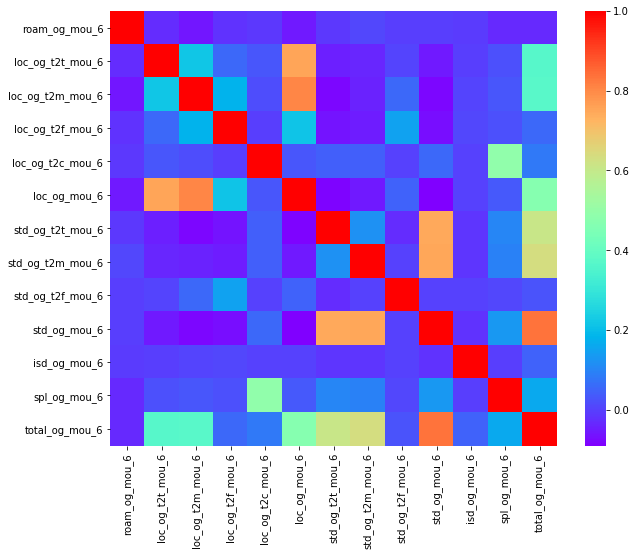

In [87]:
# let us create a correlation matrix heatmap among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(data.loc[:,mou_og_cols6].corr(), cmap="rainbow")
plt.show()

In [88]:
## fact checking!!
print(data.loc[7,'total_og_mou_6'],data.loc[7,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())

print(data.loc[7,'std_og_mou_6'],data.loc[7,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())

print(data.loc[7,'loc_og_mou_6'],data.loc[7,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

487.53 487.52000000000004
60.86 60.849999999999994
422.16 422.15


In [89]:
# As total_og_mou_6, std_og_mou_6 and loc_og_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

ls_total_og_cols = data.columns[data.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]

print(ls_total_og_cols)

data.drop(ls_total_og_cols,axis=1,inplace=True)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


In [90]:
# let's define good phase derived variables for all og components:
data['spl_og_mou_good_ph'] = (data.spl_og_mou_6 + data.spl_og_mou_7)/2
data['isd_og_mou_good_ph'] = (data.isd_og_mou_6 + data.isd_og_mou_7)/2
data['roam_og_mou_good_ph'] = (data.roam_og_mou_6 + data.roam_og_mou_7)/2
data['std_og_t2m_mou_good_ph'] = (data.std_og_t2m_mou_6 + data.std_og_t2m_mou_7)/2
data['std_og_t2t_mou_good_ph'] = (data.std_og_t2t_mou_6 + data.std_og_t2t_mou_7)/2
data['std_og_t2f_mou_good_ph'] = (data.std_og_t2f_mou_6 + data.std_og_t2f_mou_7)/2

data['loc_og_t2m_mou_good_ph'] = (data.loc_og_t2m_mou_6 + data.loc_og_t2m_mou_7)/2
data['loc_og_t2t_mou_good_ph'] = (data.loc_og_t2t_mou_6 + data.loc_og_t2t_mou_7)/2
data['loc_og_t2f_mou_good_ph'] = (data.loc_og_t2f_mou_6 + data.loc_og_t2f_mou_7)/2
data['loc_og_t2c_mou_good_ph'] = (data.loc_og_t2c_mou_6 + data.loc_og_t2c_mou_7)/2

In [91]:
# drop all the original og mou variables
ls_og = data.columns[data.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]

print(ls_og)

data.drop(ls_og,axis=1,inplace=True)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
       'spl_og_mou_7'],
      dtype='object')


In [92]:
mou_ic_cols6 = data.columns[data.columns.str.contains('.*_ic_.*mou_6',regex=True)]

mou_ic_cols6

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

In [93]:
print(data.loc[7,'total_ic_mou_6'],data.loc[7,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())

print(data.loc[7,'loc_ic_mou_6'],data.loc[7,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())

print(data.loc[7,'std_ic_mou_6'],data.loc[7,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

626.46 626.92
427.88 427.86
180.54 180.51999999999998


In [94]:
# As total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

ls_total_ic_cols = data.columns[data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

print(ls_total_ic_cols)

data.drop(ls_total_ic_cols,axis=1,inplace=True)

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')


In [95]:
# let's define good phase derive variables for all ic components:
data['spl_ic_mou_good_ph'] = (data.spl_ic_mou_6 + data.spl_ic_mou_7)/2
data['isd_ic_mou_good_ph'] = (data.isd_ic_mou_6 + data.isd_ic_mou_7)/2
data['roam_ic_mou_good_ph'] = (data.roam_ic_mou_6 + data.roam_ic_mou_7)/2
data['std_ic_t2m_mou_good_ph'] = (data.std_ic_t2m_mou_6 + data.std_ic_t2m_mou_7)/2
data['std_ic_t2t_mou_good_ph'] = (data.std_ic_t2t_mou_6 + data.std_ic_t2t_mou_7)/2
data['std_ic_t2f_mou_good_ph'] = (data.std_ic_t2f_mou_6 + data.std_ic_t2f_mou_7)/2

data['loc_ic_t2m_mou_good_ph'] = (data.loc_ic_t2m_mou_6 + data.loc_ic_t2m_mou_7)/2
data['loc_ic_t2t_mou_good_ph'] = (data.loc_ic_t2t_mou_6 + data.loc_ic_t2t_mou_7)/2
data['loc_ic_t2f_mou_good_ph'] = (data.loc_ic_t2f_mou_6 + data.loc_ic_t2f_mou_7)/2

In [96]:
# drop all the original og mou variables
ls_ic = data.columns[data.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7',regex=True)]

print(ls_ic)

data.drop(ls_ic,axis=1,inplace=True)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'isd_ic_mou_6', 'isd_ic_mou_7'],
      dtype='object')


In [97]:
offnet_cols = data.columns[data.columns.str.contains('offnet',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'offnet_mou_6', 7: 'offnet_mou_7', 8: 'offnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,365.00,377.86,352.67,463.30,489.69,490.09
Churned,469.88,382.34,143.58,650.81,592.65,326.10


<Figure size 1224x504 with 0 Axes>

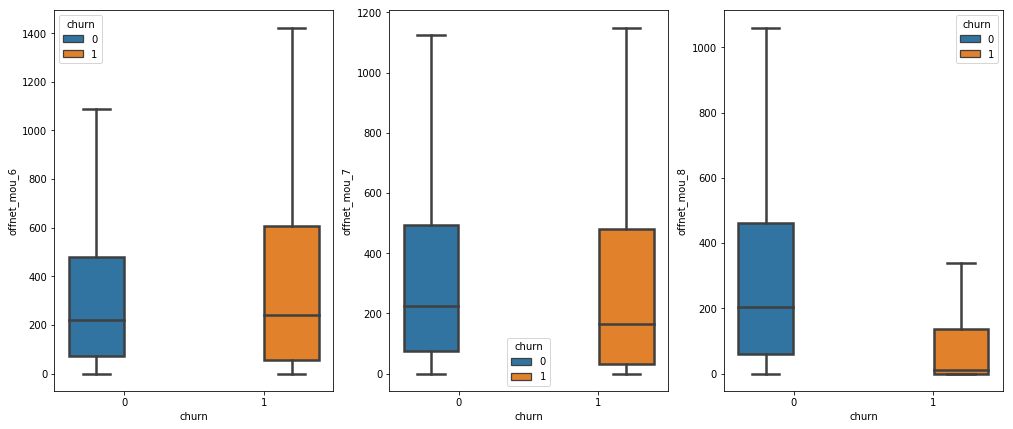

In [98]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_feature('offnet_mou')

In [99]:
# Let us define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
data['offnet_mou_good_ph'] = (data.offnet_mou_6 + data.offnet_mou_7)/2

# drop the original columns as these are not longer required
data.drop(['offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

In [100]:
#let's extract the minutes of usage related columns
onnet_cols =  data.columns[data.columns.str.contains('^onnet.*mou',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'onnet_mou_6', 7: 'onnet_mou_7', 8: 'onnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,251.03,265.81,245.19,442.16,474.49,466.53
Churned,368.64,292.57,115.96,610.84,539.19,341.54


<Figure size 1224x504 with 0 Axes>

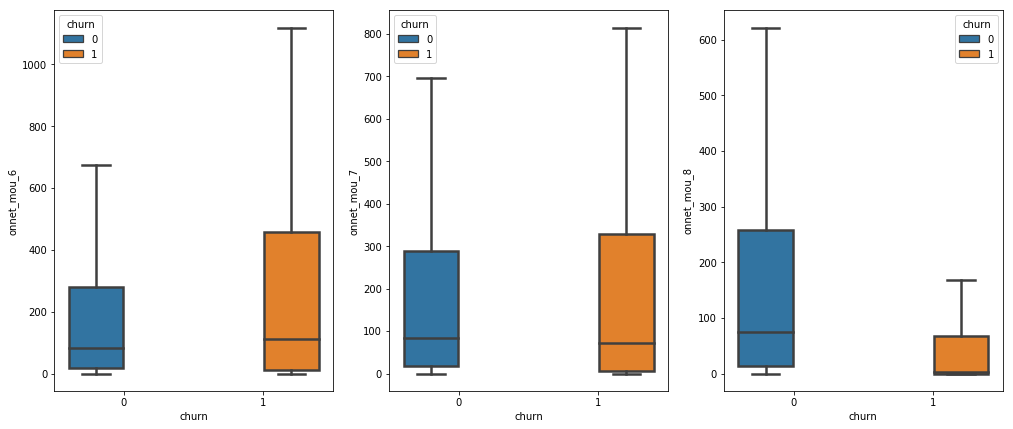

In [101]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_feature('onnet_mou')

In [102]:
# Let us define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
data['onnet_mou_good_ph'] = (data.onnet_mou_6 + data.onnet_mou_7)/2

# drop the original columns as these are not longer required
data.drop(['onnet_mou_6','onnet_mou_7'],axis=1,inplace=True)

In [103]:
# let's check summary stats for oc others and ic others mou
ls_others = data.columns[data.columns.str.contains('_others')]

print(data.loc[:,ls_others].describe())

        og_others_6   og_others_7   og_others_8   ic_others_6   ic_others_7  \
count  29411.000000  29417.000000  28781.000000  29411.000000  29417.000000   
mean       0.673738      0.043743      0.060043      1.176512      1.529164   
std        4.147630      2.703227      3.384640     14.124567     16.153401   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.060000      0.000000   
max      609.810000    370.130000    394.930000   1344.140000   1495.940000   

        ic_others_8  
count  28781.000000  
mean       1.276098  
std       13.048836  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.060000  
max     1209.860000  


In [104]:
# Let us define two new derived columns
data['og_others_good_ph'] = (data.og_others_6 + data.og_others_7)/2
data['ic_others_good_ph'] = (data.ic_others_6 + data.ic_others_6)/2
# drop the original columns as these are not longer required
data.drop(['og_others_6','og_others_7','ic_others_6','ic_others_7'],axis=1,inplace=True)

In [105]:
is_more_than_20 = data.isnull().sum()/len(data) > 0.2
100*data.loc[:,is_more_than_20].isnull().sum()/len(data.loc[:,is_more_than_20])

night_pck_user_6               44.112443
night_pck_user_7               43.117551
night_pck_user_8               46.799987
fb_user_6                      44.112443
fb_user_7                      43.117551
fb_user_8                      46.799987
day_of_last_rech_data_shift    59.883818
dtype: float64

In [106]:
data.drop(data.columns[is_more_than_20],axis=1,inplace=True)

In [107]:
# let's check how many variables are remaining!!
data.shape

(29953, 78)

In [108]:
is_na = data.isnull().sum()/len(data) > 0
100*data.loc[:,is_na].isnull().sum()/len(data.loc[:,is_na])

og_others_8               3.912797
ic_others_8               3.912797
day_of_last_rech_shift    2.306948
og_others_good_ph         2.600741
ic_others_good_ph         1.809502
dtype: float64

In [109]:
data.loc[:,:] = data.loc[:,:].replace(np.NaN,0)

### Lets build the model to check the actual churn customer

In [110]:
#lets put feature variable to X and target variable to y
X=data.drop(['churn','mobile_number'],axis=1)

In [111]:
y=data['churn']

In [112]:
# extract good phase feature list and 8th month feature list
f_good_ph = X.loc[:,X.columns.str.contains('good_ph')]
f_8 = X.loc[:,X.columns.str.contains('_8')]

In [113]:
# define function to calculate difference between 8th month feature and good phase feature
def FindDiff(x,y):      
    diff = 0.00
    if np.isnan(x) and np.isnan(y):
        diff = np.NAN
    elif np.isnan(y) and ~np.isnan(x):
        diff = x
    elif ~np.isnan(y)and np.isnan(x):
        diff = -y
    else:
        diff = x-y

    return(diff)
            

In [114]:
X_diff=X.copy()

In [115]:
# extract features without any good phase or 8th month indicator.
features_to_explore = set(map(lambda x: x.replace("_good_ph", ""), f_good_ph))
features_to_explore

{'arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_rech_amt',
 'total_rech_amt_data',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [116]:
# create new derived columns for action phase.
for feat in features_to_explore:
    X_diff[feat+'_act_ph']= np.vectorize(FindDiff)(X_diff[feat+'_8'], X_diff[feat+'_good_ph'])

In [117]:
X_diff.drop(f_8,axis=1,inplace=True)

## Now we have to perform feature standeralization

In [118]:
#Lets import standard Scaler
from sklearn.preprocessing import StandardScaler


In [119]:
cols=X_diff.columns

In [120]:
scaler=StandardScaler()

In [121]:
X_scaled=scaler.fit_transform(X_diff)

In [122]:
# convert to data frame
X_scaled = pd.DataFrame(X_diff, columns=cols)

In [123]:
#Spliting th data int train and test data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=100)

## lets calculate the confusion matrix,f1_score and roc,auc_score

In [124]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score
def printmatrix(y_test,y_pred):
    cp=confusion_matrix(y_test,y_pred)
    sensitivity=cp[1,1]/(cp[0,0],cp[1,1])
    specificity=cp[0,0]/(cp[1,1],cp[0,0])
    precision=cp[1,1]/(cp[0,0],cp[1,1])
    print("confusion_matrix",cp)
    print("Sensitivity",sensitivity)
    print("Specificity",specificity)
    print("AUC_SCORE",roc_auc_score(y_test,y_pred))
    print("Precision",precision)
    print("f1_score",f1_score(y_test,y_pred))

### lets build logistic regression model

In [125]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [126]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_pred=lg.predict(X_test)

In [128]:
# print model evaluation metrics
printmatrix(y_test,y_pred)

confusion_matrix [[8172  108]
 [ 495  211]]
Sensitivity [0.02581987 1.        ]
Specificity [38.72985782  1.        ]
AUC_SCORE 0.6429116886316049
Precision [0.02581987 1.        ]
f1_score 0.41170731707317076


## To handle imbalanced data

In [129]:
def makeoversampleSMOTE(X,y):
    from imblearn.over_sampling import SMOTE
    sm=SMOTE()
    X,y=sm.fit(X_train,y_train)
    return X,y
    

## now we will do undersampling

In [130]:
# function to undersample majority class
def MajorityClassUnderSampler(X_train,y_train):
    # create training data frame
    df_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)],axis=1)
    
    # select the minority class (in our case churn)
    df_train_minority_class  = df_train.loc[df_train.churn == 1,:]
    
    # create data frame with majority class samples same as minority class
    df_train_majority_undersampled = pd.concat([df_train_minority_class,df_train.loc[df_train.churn == 0,:].sample(df_train_minority_class.shape[0])])

    return df_train_majority_undersampled

In [131]:
# create majority class undersampled data frame from training data
df_train_mju = MajorityClassUnderSampler(X_train,y_train)

# extract features and labels
X_mju = df_train_mju.drop('churn',axis=1)
y_mju = df_train_mju.churn

In [132]:
lg=LogisticRegression()
lg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
y_pred=lg.predict(X_test)

In [134]:
printmatrix(y_test,y_pred)

confusion_matrix [[7223 1057]
 [ 661   45]]
Sensitivity [0.0062301 1.       ]
Specificity [160.51111111   1.        ]
AUC_SCORE 0.46804118596981015
Precision [0.0062301 1.       ]
f1_score 0.0497787610619469


In [135]:
sensitivity_avg = 0
specificity_avg = 0
auc_score_avg = 0
precision_avg = 0

for i in range(0,10):
    
    df_train_mju = MajorityClassUnderSampler(X_train,y_train)
    # extract features and labels
    X_mju = df_train_mju.drop('churn',axis=1)
    y_mju = df_train_mju.churn
    lsr = LogisticRegression()
    lsr.fit(X_mju,y_mju)
    #lsr.fit(X_rs,y_rs)
    y_pred = lsr.predict(X_test)
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    auc_score = roc_auc_score(y_test,y_pred)
    sensitivity_avg = sensitivity_avg + sensitivity
    specificity_avg = specificity_avg+ specificity
    auc_score_avg = auc_score_avg + auc_score
    precision_avg = precision_avg + precision

In [136]:
print('Sensitivity: ',sensitivity_avg/10)
print('Specificity: ',specificity_avg/10)
print('AUC Score: ',auc_score_avg/10)
print('Precision: ',precision_avg/10)

Sensitivity:  0.8579320113314448
Specificity:  0.798707729468599
AUC Score:  0.8283198704000219
Precision:  0.2666255455119678


## Now we will use PCA for dimension reduction

In [137]:
from sklearn.decomposition import PCA
pca=PCA(svd_solver='randomized',random_state=101)

In [138]:
pca.fit(X_mju)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=101,
    svd_solver='randomized', tol=0.0, whiten=False)

In [139]:
#Lets check the feature with top pca components
colname=list(X_scaled.columns)

In [140]:
pca1=pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'features':colname})

In [141]:
pca1.head()

,PC1,PC2,features
0,-0.082276,-0.472415,aon
1,-0.017388,0.236625,total_rech_amt_good_ph
2,0.653816,-0.075413,total_rech_amt_data_good_ph
3,0.004588,-0.003204,max_rech_amt_good_ph
4,0.000653,-0.001004,last_day_rch_amt_good_ph


## Lets draw the scree plot

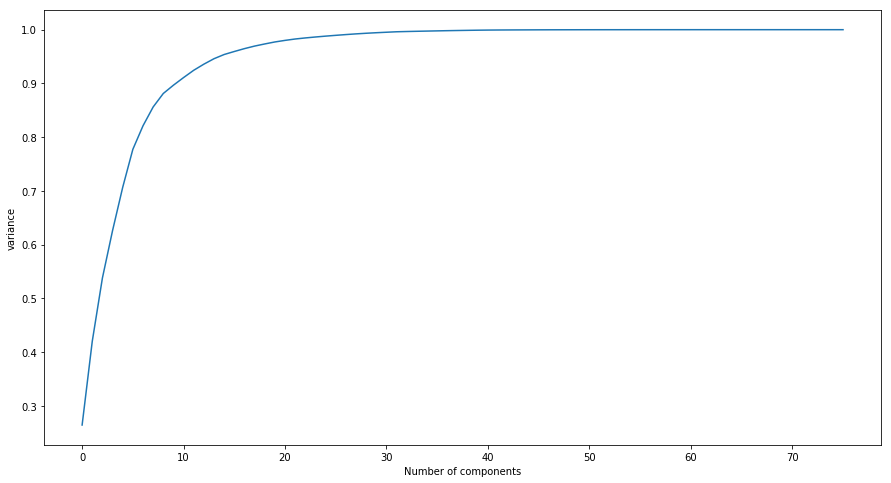

In [142]:
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("variance")
plt.show()

### lets use incremental pca for efficiency

In [143]:
from sklearn.decomposition import IncrementalPCA
inc_pca=IncrementalPCA(n_components=40)

In [144]:
X_train_pca=inc_pca.fit_transform(X_mju)

In [145]:
X_train_pca.shape

(3616, 40)

In [147]:
X_test_pca = inc_pca.transform(X_test)
X_test_pca.shape

(8986, 40)

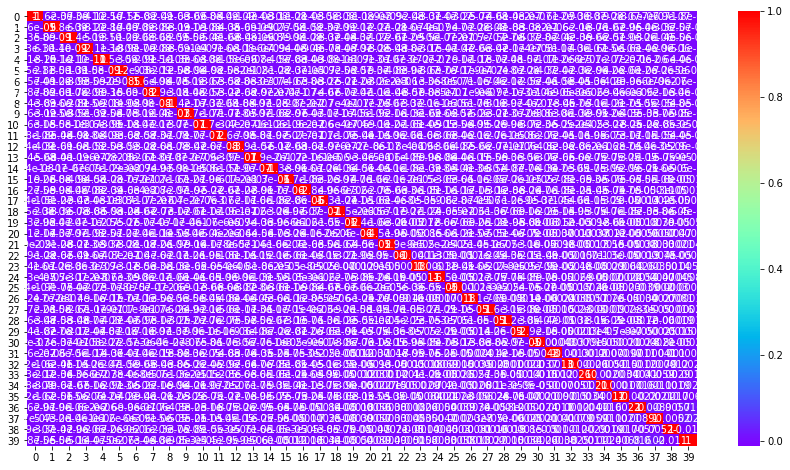

In [148]:
corr=np.corrcoef(X_train_pca.transpose())
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="rainbow")

In [149]:
lr_pca = LogisticRegression()
model_pca = lr_pca.fit(X_train_pca,y_mju)

In [150]:
y_pred = lr_pca.predict(X_test_pca)

In [151]:
printmatrix(y_test,y_pred)

confusion_matrix [[6429 1851]
 [ 103  603]]
Sensitivity [0.09379375 1.        ]
Specificity [10.66169154  1.        ]
AUC_SCORE 0.8152784620437658
Precision [0.09379375 1.        ]
f1_score 0.38164556962025314


In [152]:
# check the predicted probabilities
y_pred_prob = lr_pca.predict_proba(X_test_pca)

In [153]:
# create predicted probability data frame
y_pred_prob_df = pd.DataFrame(y_pred_prob)
y_pred_prob_df = y_pred_prob_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_pred_prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_prob_df
y_pred_final = pd.concat([y_test_df,y_pred_prob_df],axis=1)

In [154]:
# renaming column
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,churn,ID,Churn_Prob
0,0,48388,0.728391
1,0,29754,0.003374
2,0,50131,0.072593
3,0,66630,0.060212
4,0,91920,0.570371


In [155]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churn','Churn_Prob'], axis=1)
y_pred_final.head()

,ID,churn,Churn_Prob
0,48388,0,0.728391
1,29754,0,0.003374
2,50131,0,0.072593
3,66630,0,0.060212
4,91920,0,0.570371


In [156]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,ID,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,48388,0,0.728391,1,1,1,1,1,1,1,1,0,0
1,29754,0,0.003374,1,0,0,0,0,0,0,0,0,0
2,50131,0,0.072593,1,0,0,0,0,0,0,0,0,0
3,66630,0,0.060212,1,0,0,0,0,0,0,0,0,0
4,91920,0,0.570371,1,1,1,1,1,1,0,0,0,0


In [157]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','speci','sensi','preci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,speci,sensi,preci]
print(cutoff_df)

     prob  accuracy     speci     sensi     preci
0.0   0.0  0.078567  0.000000  1.000000  0.078567
0.1   0.1  0.382706  0.332609  0.970255  0.110288
0.2   0.2  0.515469  0.478502  0.949008  0.134322
0.3   0.3  0.615736  0.589493  0.923513  0.160948
0.4   0.4  0.703316  0.686473  0.900850  0.196782
0.5   0.5  0.782551  0.776449  0.854108  0.245721
0.6   0.6  0.850211  0.854469  0.800283  0.319209
0.7   0.7  0.897619  0.914251  0.702550  0.411277
0.8   0.8  0.919653  0.955435  0.500000  0.488920
0.9   0.9  0.926886  0.988527  0.203966  0.602510


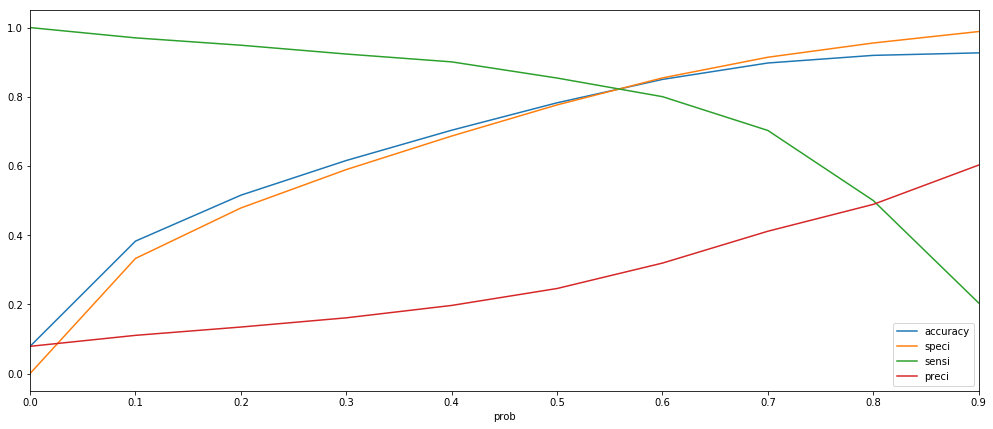

In [158]:
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi','preci'])

In [159]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.51 else 0)

In [160]:
#Let's check the overall accuracy.
printmatrix(y_pred_final.churn, y_pred_final.final_predicted)

confusion_matrix [[6507 1773]
 [ 108  598]]
Sensitivity [0.09190103 1.        ]
Specificity [10.8812709  1.       ]
AUC_SCORE 0.8164475304840497
Precision [0.09190103 1.        ]
f1_score 0.38869028274293144


## Build linear SVM model

In [161]:
# import linear SVM
from sklearn.svm import LinearSVC

# Build linear SVM model
SVM = LinearSVC()
SVM.fit(X_train_pca, y_mju)
printmatrix(y_test, SVM.predict(X_test_pca))

confusion_matrix [[6093 2187]
 [ 181  525]]
Sensitivity [0.08616445 1.        ]
Specificity [11.60571429  1.        ]
AUC_SCORE 0.7397478137701687
Precision [0.08616445 1.        ]
f1_score 0.3071971913399649


In [162]:
# import stats model
import statsmodels.api as sm

In [163]:
# Putting feature variable to X
X = data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = data['churn']

In [164]:
# extract columns
cols = X.columns

# apply standard scalar
scaler = StandardScaler()

# produce scaled features
X_scaled = scaler.fit_transform(X)

# convert to data frame
X_scaled = pd.DataFrame(X_scaled, columns=cols)

In [165]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

# create majority class undersampled data frame from training data
df_train_mju = MajorityClassUnderSampler(X_train,y_train)

# extract features and labels
X_mju = df_train_mju.drop('churn',axis=1)
y_mju = df_train_mju.churn

In [166]:
X_mju.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,std_ic_t2m_mou_good_ph,std_ic_t2t_mou_good_ph,std_ic_t2f_mou_good_ph,loc_ic_t2m_mou_good_ph,loc_ic_t2t_mou_good_ph,loc_ic_t2f_mou_good_ph,offnet_mou_good_ph,onnet_mou_good_ph,og_others_good_ph,ic_others_good_ph
20,-0.959696,-0.470994,-0.664291,-0.168679,-0.189787,-0.263137,-0.585519,-0.301900,-0.238110,-0.373493,...,0.338502,-0.089268,-0.130306,0.740011,1.499790,0.306012,-0.377406,1.730811,-0.142043,-0.082535
33,-0.919750,-0.510841,-0.668005,-0.168679,-0.135111,-0.343476,-0.649478,-0.301900,-0.047833,-0.373493,...,-0.236650,-0.080614,-0.153462,-0.422898,-0.313728,-0.311604,-0.751271,-0.526798,-0.142043,-0.082535
39,-0.003542,-0.496760,0.265484,-0.168679,-0.189787,-0.315085,1.189690,-0.301900,-0.238110,-0.373493,...,0.080048,-0.185861,0.006399,2.172746,-0.286385,-0.261357,1.709719,-0.530833,-0.142043,-0.082535
53,-0.854022,-0.440366,-0.691720,-0.168679,-0.189787,-0.201389,-0.642077,-0.301900,-0.238110,-0.373493,...,-0.319361,-0.201905,-0.153183,-0.530447,-0.186807,-0.282312,-0.802192,-0.569904,0.127728,-0.082535
73,-0.283468,-0.146390,-0.403303,1.113778,0.206977,-0.340620,-0.616279,-0.286528,-0.138775,0.026023,...,-0.302021,-0.148649,-0.153462,-0.674233,-0.392354,-0.037947,-0.582335,-0.041041,-0.142043,-0.061101


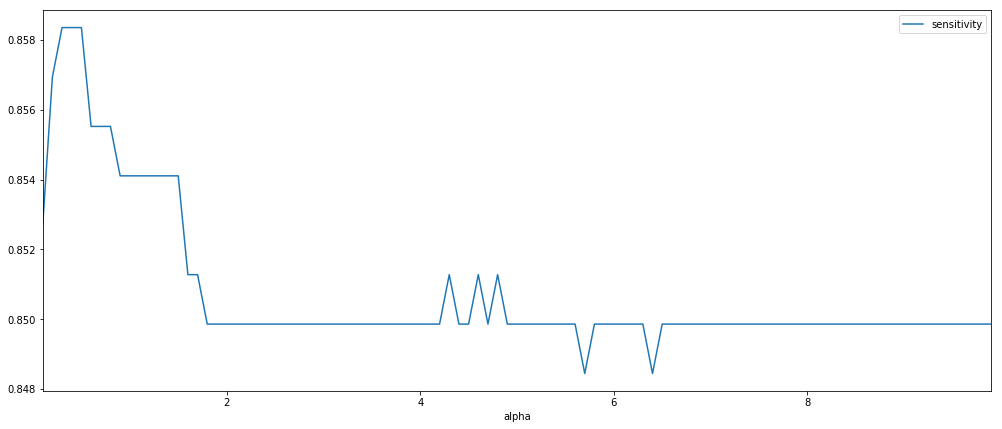

In [167]:
## Lasso Regression Feature Selection
possible_alpha = [i/10 for i in range(1, 100)]
alpha_sensitivity = []

for alpha in possible_alpha:
    lassolr = LogisticRegression(C=alpha, penalty='l1', solver='liblinear')
    lassolr.fit(X_mju, y_mju)
    cp = confusion_matrix(y_test, lassolr.predict(X_test))
    alpha_sensitivity.append({"alpha": alpha, "sensitivity": cp[1,1]/(cp[1,0]+cp[1,1])})

pd.DataFrame(alpha_sensitivity).plot.line(x='alpha', y='sensitivity')

In [168]:
# run with alpha=0.4 and penalty = 'l1'
lassolr = LogisticRegression(C=4, penalty='l1', solver='liblinear')
lassolr.fit(X_mju, y_mju)
LR_coefs = dict(zip(X_mju.columns, lassolr.coef_[0]))
{k:v for k,v in LR_coefs.items() if v == 0}

{'loc_og_t2m_mou_good_ph': 0.0}

In [169]:
# function to test model, print metrics, VIF score and can drop columns
def test_model(x_train, x_test, y_train, y_test, cols_to_drop = None):
    cols_to_drop = cols_to_drop or []
    x_train = x_train.drop(cols_to_drop, axis=1)
    x_test = x_test.drop(cols_to_drop, axis=1)
    lr = LogisticRegression(C=4.0, penalty='l1', solver='liblinear')
    lr.fit(x_train, y_train)
    print("Scoring on TEST {}, TRAIN {}".format(lr.score(x_test,y_test), lr.score(x_train,y_train)))
    printmatrix(y_test,lr.predict(x_test))
    x_train = sm.add_constant(x_train)
    stat_model = sm.Logit(y_train, x_train).fit_regularized(method='l1')
    print(stat_model.summary())
    # calculate VIF
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    for i, var in enumerate(x_train.columns):
        ## Even if we are doing a logistic regression above
        ## Do a Linear Regression here as we are just trying 
        ## to find the variance of the features, how multicollinear
        rsq = sm.OLS(x_train[var], x_train.drop([var], axis=1)).fit().rsquared
        vif = round( 1 / (1 - rsq + 0.00000000001), 2)
        vif_df.loc[i] = [var, vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [170]:
# run model on majority undersampled training data
test_model(X_mju, X_test, y_mju, y_test)

Scoring on TEST 0.808924994435789, TRAIN 0.8329646017699115
confusion_matrix [[6668 1612]
 [ 105  601]]
Sensitivity [0.09013197 1.        ]
Specificity [11.09484193  1.        ]
AUC_SCORE 0.8282943985986233
Precision [0.09013197 1.        ]
f1_score 0.4117848578280233
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4070697348133594
            Iterations: 458
            Function evaluations: 458
            Gradient evaluations: 458
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3616
Model:                          Logit   Df Residuals:                     3539
Method:                           MLE   Df Model:                           76
Date:                Sat, 17 Aug 2019   Pseudo R-squ.:                  0.4127
Time:                        09:31:08   Log-Likelihood:                -1472.0
converged:                       True   LL-

,Var,Vif
3,offnet_mou_8,10046.78
11,std_og_t2m_mou_8,7502.46
2,onnet_mou_8,6071.74
10,std_og_t2t_mou_8,4546.21
73,offnet_mou_good_ph,3817.42
74,onnet_mou_good_ph,3293.96
57,std_og_t2m_mou_good_ph,3086.41
58,std_og_t2t_mou_good_ph,2693.27
7,loc_og_t2m_mou_8,1608.31
6,loc_og_t2t_mou_8,1254.24


In [171]:
cols_to_drop=["onnet_mou_8", "std_og_t2m_mou_8", "onnet_mou_good_ph",
       "offnet_mou_good_ph", "roam_ic_mou_good_ph", "loc_og_t2m_mou_good_ph",
      "og_others_8", "total_rech_amt_good_ph", "total_rech_amt_8", "isd_ic_mou_good_ph",
      "arpu_8", "vol_3g_mb_8", "loc_og_t2f_mou_good_ph", "isd_og_mou_8",
      "loc_ic_t2f_mou_good_ph", "spl_og_mou_good_ph", "std_ic_t2m_mou_good_ph",
      "std_og_t2f_mou_good_ph", "total_rech_amt_data_good_ph", "max_rech_data_good_ph",
      "std_ic_t2f_mou_good_ph", "loc_og_t2f_mou_8", "vbc_3g_good_ph", "isd_og_mou_good_ph",
      "total_rech_amt_data_8", "max_rech_amt_good_ph", "total_rech_num_good_ph",
      "sachet_2g_good_ph", "ic_others_8", "std_ic_t2f_mou_8", "og_others_good_ph",
      "ic_others_good_ph", "roam_ic_mou_8", "monthly_3g_good_ph", "loc_ic_t2m_mou_8",
      "loc_ic_t2m_mou_good_ph", "isd_ic_mou_8", "loc_og_t2c_mou_good_ph", "last_day_rch_amt_good_ph",
      "std_og_t2f_mou_8", "sachet_3g_good_ph", "sachet_3g_8", "std_og_t2t_mou_good_ph",
      "spl_ic_mou_good_ph", "loc_og_t2c_mou_8", "spl_og_mou_8", "vbc_3g_8",
      "vol_3g_mb_good_ph", "roam_og_mou_good_ph", "monthly_2g_8", "monthly_3g_8",
      "loc_og_t2t_mou_good_ph", "loc_og_t2t_mou_8", "max_rech_amt_8", "spl_ic_mou_8",
      "std_ic_t2t_mou_good_ph", "std_ic_t2m_mou_8", "std_ic_t2t_mou_8","std_og_t2m_mou_good_ph"]


LR_FEATURES = list(set(X_mju.columns) - set(cols_to_drop))

In [172]:
# run with columns to be dropped to check the final p-values and VIF
test_model(X_mju, X_test, y_mju, y_test, cols_to_drop=cols_to_drop)

Scoring on TEST 0.7923436456710439, TRAIN 0.8102876106194691
confusion_matrix [[6525 1755]
 [ 111  595]]
Sensitivity [0.09118774 1.        ]
Specificity [10.96638655  1.        ]
AUC_SCORE 0.8154098411134376
Precision [0.09118774 1.        ]
f1_score 0.38939790575916233
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4618773315140973
            Iterations: 78
            Function evaluations: 79
            Gradient evaluations: 78
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3616
Model:                          Logit   Df Residuals:                     3598
Method:                           MLE   Df Model:                           17
Date:                Sat, 17 Aug 2019   Pseudo R-squ.:                  0.3337
Time:                        09:31:54   Log-Likelihood:                -1670.1
converged:                       True   LL-N

,Var,Vif
5,loc_ic_t2t_mou_8,2.26
17,loc_ic_t2t_mou_good_ph,2.14
13,vol_2g_mb_good_ph,1.75
10,vol_2g_mb_8,1.65
7,total_rech_num_8,1.58
1,offnet_mou_8,1.51
3,loc_og_t2m_mou_8,1.49
14,monthly_2g_good_ph,1.32
11,sachet_2g_8,1.26
0,const,1.26


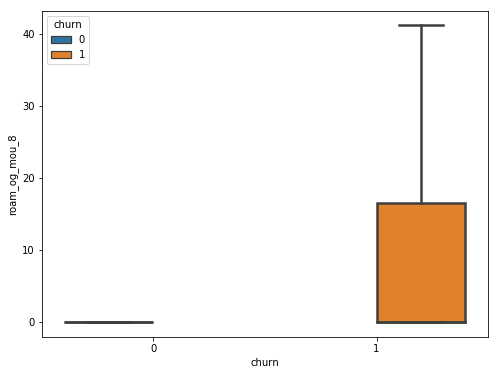

In [173]:
## Variables with positive coef
## higher the value ==> more likely to churn

plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.figure()
# High variance in Roam Outgoing Minutes of Usage, => probability of churn is high 
# if roaming minutes of usage increases. Same is apparent from the positive coef of the LR model
sns.boxplot(data=data, y="roam_og_mou_8", x="churn", hue="churn", linewidth=2.5, showfliers=False)

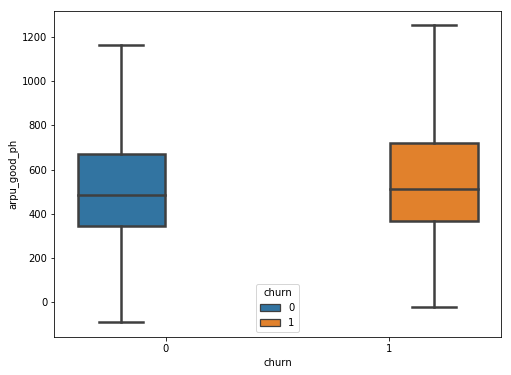

In [174]:

# High variance in ARPU of 8th month, => Customers are using some costly feature => high probability of churn
plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.figure()
sns.boxplot(data=data, y="arpu_good_ph", x="churn", hue="churn", linewidth=2.5, showfliers=False)

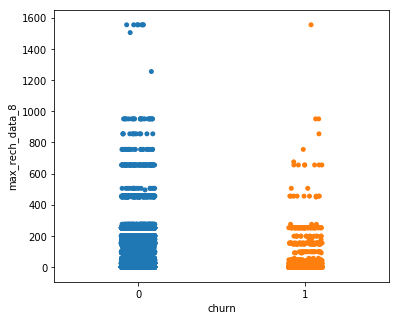

In [175]:
plt.rcParams["figure.figsize"] = [6, 5]
sns.stripplot(x="churn", y="max_rech_data_8", data=data, jitter=True)

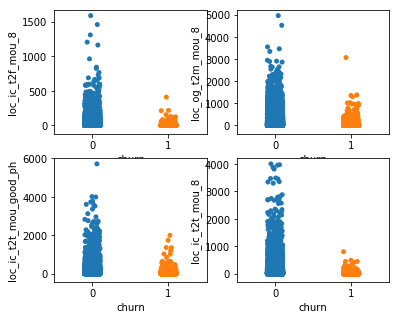

In [176]:
f,axes = plt.subplots(nrows=2, ncols=2)

sns.stripplot(x="churn", y="loc_ic_t2f_mou_8", data=data, jitter=True, ax=axes[0][0])
sns.stripplot(x="churn", y="loc_og_t2m_mou_8", data=data, jitter=True, ax=axes[0][1])
sns.stripplot(x="churn", y="loc_ic_t2t_mou_good_ph", data=data, jitter=True, ax=axes[1][0])
sns.stripplot(x="churn", y="loc_ic_t2t_mou_8", data=data, jitter=True, ax=axes[1][1])

In [177]:
# vol 2g/3g usage
ls_3g_2g = data.columns[data.columns.str.contains('vol_2g_mb|vol_3g_mb',regex=True)]

# let's check the mean variation in total recharge numbers for churned and non churned customers
pd.DataFrame([data.loc[data.churn==0,ls_3g_2g].mean()
              ,data.loc[data.churn==1,ls_3g_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_8,vol_3g_mb_8,vol_2g_mb_good_ph,vol_3g_mb_good_ph
Non Churned,113.500101,376.076421,128.246046,367.597376
Churned,22.636193,87.193178,99.319517,248.535414


## Some  strategies to manage customer churn based on OUR observations


*  Lower tarrif on data usage
*  Expansion of 3G network
*  Lower roaming charges
*  We have to customised our prepaid plans where MOU(minutes of usage ) are high
*  Provide some customer offer